In [16]:
yelp_bussines = pd.read_csv("data/yelp_bussines.csv")
yelp_bussines['categories'] = yelp_bussines['categories'].astype(str)
yelp_bussines['categories'] = yelp_bussines['categories'].str.split(",")

In [3]:
food_bussines = pd.DataFrame()
food_categorias = ['Restaurants', 'Food', 'Sandwiches', 'Nightlife', 'Bars', 'Breakfast & Brunch', 'Mexican', 'Chinese', 'Pizza', 'Japanese', 'Coffee & Tea', 'Food Delivery Services', 'Italian', 'Seafood', 'New American', 'Cafes', 'Burgers', 'American', 'Sushi Bars', 'Salad', 'Cocktail Bars', 'Noodles', 'Fast Food', 'Delis', 'Food Trucks', 'Mediterranean', 'Vietnamese', 'Asian Fusion', 'Chicken Wings', 'Indian', 'Wine Bars', 'Food Stands', 'Thai', 'Desserts', 'Event Planning & Services', 'Dim Sum', 'Bakeries', 'Korean', 'Barbeque', 'Latin American', 'Tacos', 'Ramen', 'Vegan', 'Specialty Food', 'Juice Bars & Smoothies', 'Halal', 'Soup', 'Chicken Shop', 'Beer, Wine & Spirits', 'Caterers', 'Pop-Up Restaurants', 'French', 'Vegetarian', 'Cantonese', 'Diners', 'Grocery', 'Sports Bars', 'Bagels', 'Hot Dogs', 'Gluten-Free', 'Bubble Tea', 'Middle Eastern', 'Filipino', 'Tapas/Small Plates', 'Venues & Event Spaces', 'Beer Bar', 'Creperies', 'Steakhouses', 'Comfort Food', 'Greek', 'Salvadoran', 'Ice Cream & Frozen Yogurt', 'Hawaiian', 'Donuts', 'Himalayan/Nepalese', 'Hot Pot', 'Peruvian', 'Lounges', 'Arts & Entertainment', 'Izakaya', 'Poke', 'Food Court', 'Cajun/Creole', 'Gastropubs', 'Cheesesteaks', 'Pasta Shops', 'Pakistani', 'Wraps', 'Brazilian', 'Tapas Bars', 'Convenience Stores', 'Soul Food', 'Acai Bowls', 'Burmese', 'Hong Kong Style Cafe', 'Kebab', 'Southern', 'Turkish', 'Caribbean', 'Street Vendors', 'Taiwanese', 'Japanese Curry', 'Spanish', 'Szechuan', 'Waffles', 'Empanadas', 'Pubs', 'Buffets', 'German']
for categoria in food_categorias:
    filtrados = yelp_bussines[yelp_bussines['categories'].apply(lambda x: categoria in x)]
    food_bussines = pd.concat([food_bussines, filtrados], ignore_index=True)
food_bussines = food_bussines.drop_duplicates(subset=['business_id'])
food_bussines.to_csv("data/food_bussines.csv", index=False)

In [17]:
hotel_bussines = pd.DataFrame()
hotel_categorias = ['Hotels & Travel', 'Event Planning & Services', 'Hotels', 'Venues & Event Spaces', 'Bed & Breakfast', 'Home Services', 'Real Estate', 'Apartments', 'Resorts', 'Hostels', 'Vacation Rentals', 'Guest Houses', 'Pet Sitting', 'Pets', 'Property Management', 'Residences', 'Arts & Entertainment', 'Day Spas', 'Landmarks & Historical Buildings', 'Local Services', 'Pet Groomers', 'Public Services & Government', 'Rest Stops', 'Active Life', 'Automotive', 'Commercial Real Estate', 'Parking', 'Pet Boarding', 'Professional Services', 'Retirement Homes', 'Social Clubs']
for categoria in hotel_categorias:
    filtrados = yelp_bussines[yelp_bussines['categories'].apply(lambda x: categoria in x)]
    hotel_bussines = pd.concat([hotel_bussines, filtrados], ignore_index=True)
hotel_bussines = hotel_bussines.drop_duplicates(subset=['business_id'])
hotel_bussines.to_csv("data/hotel_bussines.csv", index=False)

In [5]:
reviews = pd.read_csv('data/yelp_reviews.csv')
hotel_reviews = reviews[reviews['business_id'].isin(hotel_bussines["business_id"])]
hotel_reviews.to_csv("data/hotel_reviews.csv", index=False)

## 02_EDA

In [2]:
import warnings
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._core")

# Color palete
color_palette = {
    "white": "#FFFFFF",
    "black": "#000000",
    "github_backborund": "#0D1117"}

sns.set_theme(style="whitegrid")

# Importar y transformar sig data
sig_estados = gpd.read_file("data/sig/Estados Unidos/Estados/Estados_Unidos_Estados.shp")
sig_ciudades = gpd.read_file("data/sig/Estados Unidos/Ciudades/Estados_Unidos_Poblaciones.shp")
sig_ciudades.rename(columns={"NOMBRE": "city"}, inplace=True)
sig_estados.rename(columns={"STATE_ABBR": "state"}, inplace=True)

Cannot find header.dxf (GDAL_DATA is not defined)


tourist atractions

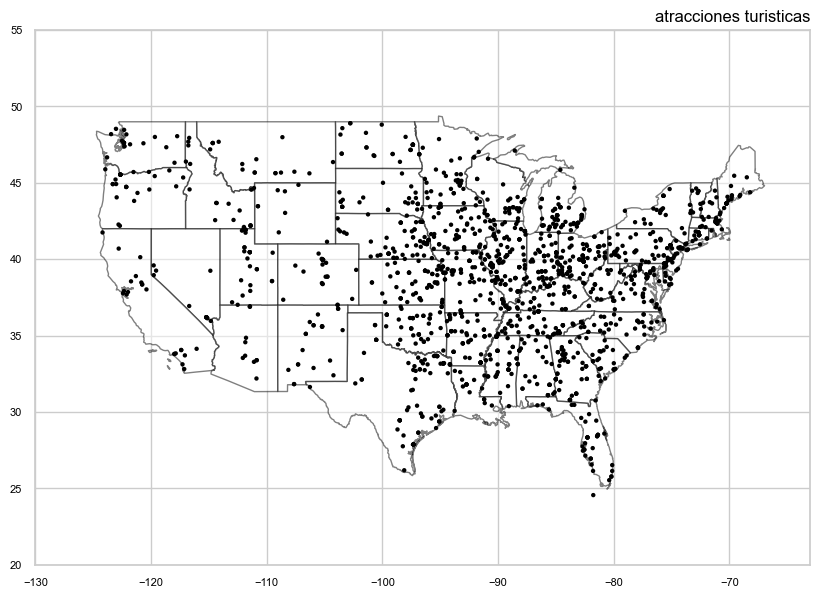

In [12]:
atractions = pd.read_csv('data/tourist_attraction.csv')
atractions.rename(columns={"ciudad": "city"}, inplace=True)
atractions = pd.merge(atractions, sig_ciudades)
atractions = gpd.GeoDataFrame(atractions, geometry="geometry")

title = "atracciones turisticas"

fig, ax = plt.subplots(figsize=(10, 10))
sig_estados.plot(ax=ax, color="white", edgecolor="black", alpha=0.5, markersize=10)
atractions.plot(ax=ax, color="black", edgecolor="none", alpha=1, markersize=10)
ax.set_xlim([-130, -63])
ax.set_ylim([20, 55])
ax.set_facecolor('white')
plt.xticks(fontsize=8, color="black")
plt.yticks(fontsize=8, color="black")
plt.title(title, fontsize=12, loc='right', color="black")
fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
fig.show()

locales de comida

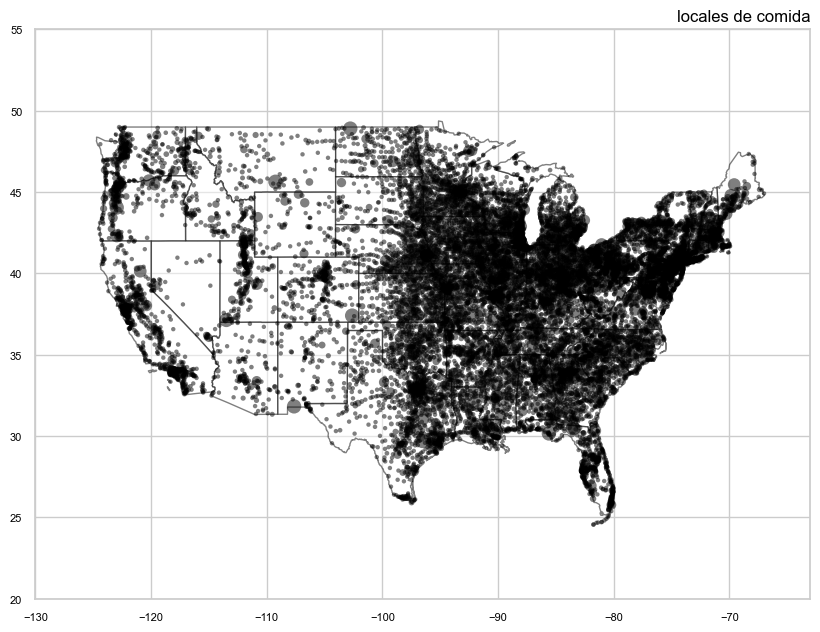

In [7]:
restaurants = pd.read_csv('data/google_business.csv')

restaurants = pd.merge(restaurants, sig_ciudades)
restaurants = gpd.GeoDataFrame(restaurants, geometry="geometry")

restaurants_count_city = restaurants.groupby("city")["business_id"].count()
restaurants_count_city_df = restaurants_count_city.reset_index(name='count')

restaurants_count_city_df = pd.merge(restaurants_count_city_df, sig_ciudades)
restaurants_count_city_df = gpd.GeoDataFrame(restaurants_count_city_df, geometry="geometry")

title = "locales de comida"

# Define a range of sizes for the markers
min_size = restaurants_count_city_df['count'].min()
max_size = restaurants_count_city_df['count'].max()
size_range = (10, 150)  # Define the desired range of marker sizes

# Normalize the count values to the size range
normalized_sizes = (restaurants_count_city_df['count'] - min_size) / (max_size - min_size)
restaurants_count_city_df['normalized_size'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

# Crear grafico
fig, ax = plt.subplots(figsize=(10, 10))
sig_estados.plot(ax=ax, color="white", edgecolor="black", alpha=0.5, markersize=10)
restaurants_count_city_df.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=restaurants_count_city_df['normalized_size'])
ax.set_xlim([-130, -63])
ax.set_ylim([20, 55])
ax.set_facecolor('white')
plt.xticks(fontsize=8, color="black")
plt.yticks(fontsize=8, color="black")
plt.title(title, fontsize=12, loc='right', color="black")
fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

restaurants

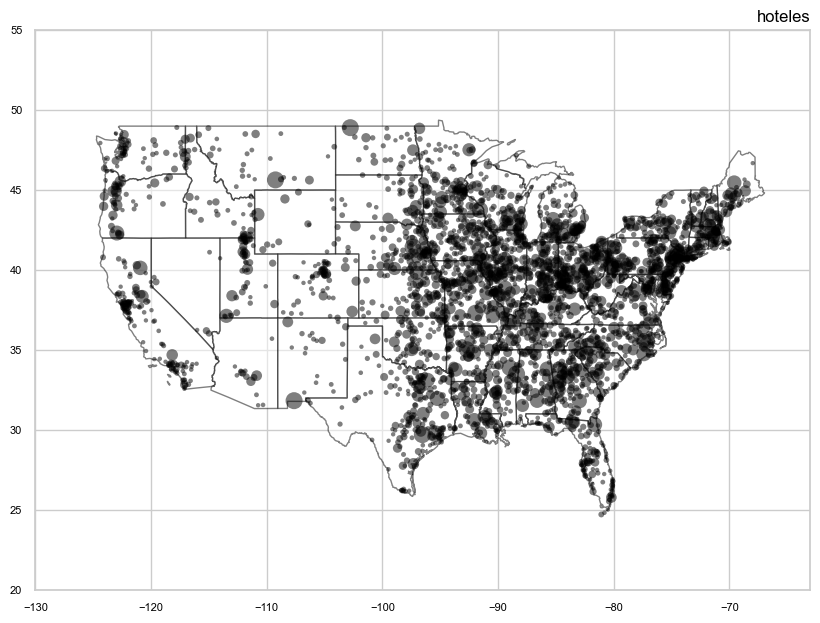

In [79]:
hotels = pd.read_csv('data/google_hotel.csv')
hotels = pd.merge(hotels, sig_ciudades)
hotels = gpd.GeoDataFrame(hotels, geometry="geometry")

hotels_count_city = hotels.groupby("city")["business_id"].count()
hotels_count_city_df = hotels_count_city.reset_index(name='count')

hotels_count_city_df = pd.merge(hotels_count_city_df, sig_ciudades)
hotels_count_city_df = gpd.GeoDataFrame(hotels_count_city_df, geometry="geometry")

title = "hoteles"

# Define a range of sizes for the markers
min_size = hotels_count_city_df['count'].min()
max_size = hotels_count_city_df['count'].max()
size_range = (10, 150)  # Define the desired range of marker sizes

# Normalize the count values to the size range
normalized_sizes = (hotels_count_city_df['count'] - min_size) / (max_size - min_size)
hotels_count_city_df['normalized_size'] = size_range[0] + normalized_sizes * (size_range[1] - size_range[0])

# Crear grafico
fig, ax = plt.subplots(figsize=(10, 10))
sig_estados.plot(ax=ax, color="white", edgecolor="black", alpha=0.5, markersize=10)
hotels_count_city_df.plot(ax=ax, color="black", edgecolor="none", alpha=0.5, markersize=hotels_count_city_df['normalized_size'])
ax.set_xlim([-130, -63])
ax.set_ylim([20, 55])
ax.set_facecolor('white')
plt.xticks(fontsize=8, color="black")
plt.yticks(fontsize=8, color="black")
plt.title(title, fontsize=12, loc='right', color="black")
fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def mapa_scatterplot_light(title, data, size=10):
    fig, ax = plt.subplots(figsize=(10, 10))
    sig_estados.plot(ax=ax, color="white", edgecolor="black", alpha=0.5, markersize=10)
    data.plot(ax=ax, color="black", edgecolor="none", alpha=0.1, markersize=size)
    ax.set_xlim([-130, -63])
    ax.set_ylim([20, 55])
    ax.set_facecolor('white')
    plt.xticks(fontsize=8, color="black")
    plt.yticks(fontsize=8, color="black")
    plt.title(title, fontsize=12, loc='right', color="black")
    fig.savefig(f"gallery/{title}_daymode.jpg", format='jpg', dpi=300, bbox_inches='tight')
    fig.show()

def mapa_scatterplot_dark(title, data, size=10):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(color='darkgrey', linewidth=0.25)
    sig_estados.plot(ax=ax, color="none", edgecolor="white", alpha=0.25, markersize=10)
    data.plot(ax=ax, color="white", edgecolor="none", alpha=0.1, markersize=size)
    ax.set_xlim([-130, -63])
    ax.set_ylim([20, 55])
    ax.set_facecolor(color_palette["github_backborund"])
    plt.xticks(fontsize=8, color="white")
    plt.yticks(fontsize=8, color="white")
    plt.title(title, fontsize=12, loc='right', color="white")
    plt.gca().set_facecolor(color_palette["github_backborund"])
    plt.gca().set_facecolor(color_palette["github_backborund"])
    fig.savefig(f"gallery/{title}_nightmode.jpg", format='jpg', dpi=300, bbox_inches='tight', facecolor=color_palette["github_backborund"])
    plt.close(fig)